
[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bonacor/CorsoSwComp/blob/master/notebooks/Project_MNIST2.ipynb)


Same task, different network architecture. 

In [18]:
#numpy
import numpy as np
#sklearn
import sklearn
# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing, so we can just upload them and have the same splitting we did in the MNIST1 notebook, for free.

Also, when we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

In [2]:
#NOTE: this might take a while..

from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


NOTE: if you run this on colab, you will notice it will download the data from Amazon AWS (i.e. cloud), direct URL is: https://s3.amazonaws.com/img-datasets/mnist.npz

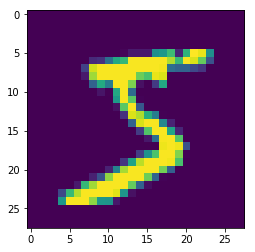

In [3]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

You will see later that a CNN will take quite some time to train.. and here you are in a very lucky case! When using real-world datasets, you may not be so lucky. 28 x 28 is also a fairly small size, so the CNN will be able to run over each image pretty quickly. Still, you will see the benefit of having a GPU.. hopefully this will help you to imagine how desperately you will need GPUs for real life tasks!

## Data preprocessing

We need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model.
* The first number is the number of images (60,000 for X_train and 10,000 for X_test).
* Then comes the shape of each image (28x28).
* The last number is 1, which signifies that the images are greyscale.

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

If we want to do multiclass classification, and not just a "5-detector" as in the MNIST1 notebook, we need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [6]:
from keras.utils import to_categorical
#one-hot encode target column
y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

In [7]:
y_train[0]

5

In [8]:
y_train_OHE[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Build the model

The model is built with the cell below. Before running it, some explanations:

* The model type that we will be using is **Sequential**, i.e. the easiest way to build a model in Keras. It allows you to build a model layer by layer, sequentially.
* We use the `add()` function to add layers to our model.
* Our first 2 layers are **Conv2D** layers. These are convolution layers that will deal with our input images, which are seen as 2D matrices.
   * the first Conv2D layer has 64 nodes
   * the second Conv2D layer has 32 nodes
* The # of nodes in a layer can be adjusted to be higher or lower, depending on the size of the dataset and of the type of problem to solve.
* `kernel_size` is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.
* **Activation** is the activation function for the layer. We will be using the ReLU, or Rectified Linear Activation, proven to work just fine in most cases of NN applications.
* The 1st layer (and only that one) also takes in an input shape, i.e. the shape of each input image (28,28,1 as seen earlier).
* In between the Conv2D layers and the Dense layer, there is a **Flatten** layer, which serves as a connection between the convolution and dense layers.
* **Dense** is the layer type we will use for the output layer. It is a standard layer type that is used in many cases for NNs. This layer will have 10 nodes in our output layer, not unexpectedly given the problem: one for each possible outcome (0–9)!
* The activation function used in the Dense layer is **softmax**. It makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Now, we need to compile the model. Compiling the model takes 3 hyper-parameters: optimizer, loss and performance metrics.
* The **optimizer** controls the learning rate. We will be using **adam** as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
* We will use `categorical_crossentropy` as the **loss function**. This is the most common choice for classification. A lower score indicates that the model is performing better.
* To make things easier to interpret here, we will just use the `accuracy` **performance metric** to see the accuracy score on the validation set when we train the model.

In [10]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

_ATTENTION: execution of the next cell will trigger model training. On a CPU 1 epoch takes few minutes, same locally or on colab.. and - if you are running locally - your CPU will surely start heating up, the fan will turn on at 50-ish% of 1st epoch, python process at >100% CPU soon, etc.. Make sure you set "epochs" to a very low value. E.g. 1 is ok to start.. then read later!_

In [11]:
#train the model
model.fit(X_train, y_train_OHE, validation_data=(X_test, y_test_OHE), epochs=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 225s - loss: 7.2454 - acc: 0.5470 - val_loss: 6.6806 - val_acc: 0.5842


After XXX epochs, we have gotten to XXX% accuracy on the validation set. That’s a very good start! **Congratulations, you have built your first CNN!**

## Exercise

[THIS MUST BE DONE ON COLAB]

Try to "change runtime type", select a GPU, reset all variables, clean all output and re-run the entire notebook so far. Focus on the cell above, where the training happens. Compare the time it takes to run 1 epoch on CPU vs GPU (vs TPU). If you do all correctly, conclusions should be self-explanatory!

Hint: `%%time` as cell magic to automatically compute how it takes to run a cell.

## Make predictions

If you want to see the actual predictions that our model has made for the test data, we can use the predict function. The predict function will give an array with 10 numbers. These numbers are the probabilities that the input image represents each digit (0–9). The array index with the highest number represents the model prediction. The sum of each array equals 1 (since each number is a probability).

To show this, we will show the predictions for the first 4 images in the test set.

_Note: If we have new data, we can input our new data into the predict function to see the predictions our model makes on the new data. Since we don’t have any new unseen data, we will show predictions using the test set for now._

Predict first 4 images in the test set:

In [19]:
model.predict(X_test[:4])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

The model predicts 7, 2, 1, 0 for the first four images. Let’s compare this with the actual labels (the truth):

In [15]:
y_test_OHE[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

The actual results show that the first four images are also 7, 2, 1, 0. The model predicted correctly!